## Este notebook tem a mesma funcionalidade do script *limiarizacao.py*, porém de uma maneira mais visual no passo a passo do processo

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import utils.transformacoes as transformacoes

## Recebe imagem e transforma em matriz:
### Coloque o nome da imagem que deseja com sua extensão

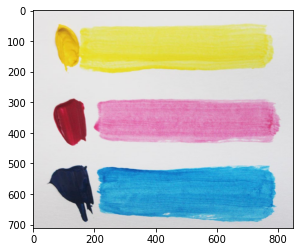

In [3]:
arquivo = os.path.join('imagens', 'tintas.jpg')
matriz_colorida = transformacoes.imagem_to_matriz(arquivo)
plt.imshow(matriz_colorida)

## Transforma imagem em tons de cinza

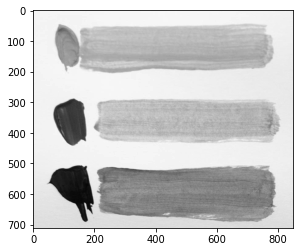

In [4]:
matriz_cinza = transformacoes.imagem_to_cinza(matriz_colorida)
plt.imshow(matriz_cinza, cmap='gray')

## Calcula o histograma da matriz em tons de cinza

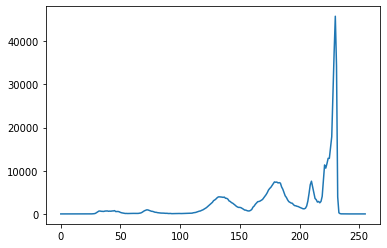

In [5]:
histograma = np.zeros(256).astype(int)
linhas = matriz_cinza.shape[0]
colunas = matriz_cinza.shape[1]

for i in range(linhas):
    for j in range(colunas):
        cor = matriz_cinza[i,j]
        cor = int(cor)
        histograma[cor] += 1

plt.plot(histograma)

## Define threshold
### O criterio para definição do treshold é achar o ponto em que divide a quantidade de pixels em duas metades quase iguais, ordenados pela cor

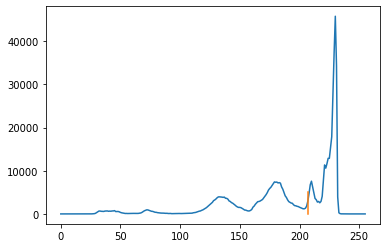

In [6]:
contador, treshold = 0, 0
metade = linhas * colunas / 2

for cor in range(256):
    contador += histograma[cor]
    if (contador + histograma[cor]) > metade:
        treshold = cor
        break;

plt.plot(histograma)
plt.plot([treshold, treshold], [0, 5000])

## Limiariza a imagem de acordo com o threshold

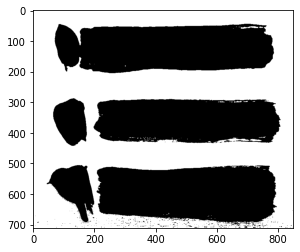

In [7]:
matriz_limiarizada = np.zeros((linhas, colunas))

for i in range(linhas):
    for j in range(colunas):
        cor = matriz_cinza[i,j]
        if cor < treshold:
            matriz_limiarizada[i,j] = 0
        else:
            matriz_limiarizada[i,j] = 255

plt.imshow(matriz_limiarizada, cmap='gray')